In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df=pd.read_csv('/content/car data.csv')

In [60]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [30]:
df.shape

(301, 9)

In [61]:
# sepearting the variables

categorical_features=[col for col in df.columns if df[col].dtype=='O']
numerical_features=[col for col in df.columns if df[col].dtype!='O']

### Hanling categorical features

In [7]:
categorical_features

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

In [13]:
for feature in categorical_features:
  print(f"Number of classes in {feature} is :  {len(np.unique(df[feature]))}")

Number of classes in Car_Name is :  98
Number of classes in Fuel_Type is :  3
Number of classes in Seller_Type is :  2
Number of classes in Transmission is :  2


 Car name is not much important

In [32]:
df.drop(columns=['Car_Name'],inplace=True)
categorical_features.remove('Car_Name')

In [18]:
# class labels in categorical features 

for feature in categorical_features:
  print(f"Class Labels in {feature} are :  {np.unique(df[feature])}")

Class Labels in Fuel_Type are :  ['CNG' 'Diesel' 'Petrol']
Class Labels in Seller_Type are :  ['Dealer' 'Individual']
Class Labels in Transmission are :  ['Automatic' 'Manual']


In [33]:
## checking missing values
for feature in categorical_features:
  print(f"Missing values in {feature} are :  {df[feature].isnull().sum()}")



Missing values in Fuel_Type are :  0
Missing values in Seller_Type are :  0
Missing values in Transmission are :  0


In [62]:
# converting the categorical features to numbers using simply the dummies values

fuel_type_dummy=pd.get_dummies(df['Fuel_Type'],drop_first=True)
seller_type_dummy=pd.get_dummies(df['Seller_Type'],drop_first=True)
transmission_dummy=pd.get_dummies(df['Transmission'],drop_first=True)

In [63]:
# concating them to main data frame

df=pd.concat([df,fuel_type_dummy,seller_type_dummy,transmission_dummy],axis=1)

In [64]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Diesel,Petrol,Individual,Manual
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,1,0,1
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,1,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,1,0,1
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,1,0,0,1


In [65]:
# droppping the original one

df.drop(columns=categorical_features,inplace=True)

## Handling Numerical features

In [66]:
numerical_features

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

In [40]:
df[numerical_features].head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0


In [67]:
# converting year to usefull information no of years

df['No.Years']=[2021-year for year in df['Year']]

In [68]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Diesel,Petrol,Individual,Manual,No.Years
0,2014,3.35,5.59,27000,0,0,1,0,1,7
1,2013,4.75,9.54,43000,0,1,0,0,1,8
2,2017,7.25,9.85,6900,0,0,1,0,1,4
3,2011,2.85,4.15,5200,0,0,1,0,1,10
4,2014,4.60,6.87,42450,0,1,0,0,1,7


In [69]:
# dropping the year columns

df.drop(columns=['Year'],inplace=True)
numerical_features.remove('Year')
numerical_features.append('No.Years')


In [70]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Diesel,Petrol,Individual,Manual,No.Years
0,3.35,5.59,27000,0,0,1,0,1,7
1,4.75,9.54,43000,0,1,0,0,1,8
2,7.25,9.85,6900,0,0,1,0,1,4
3,2.85,4.15,5200,0,0,1,0,1,10
4,4.60,6.87,42450,0,1,0,0,1,7


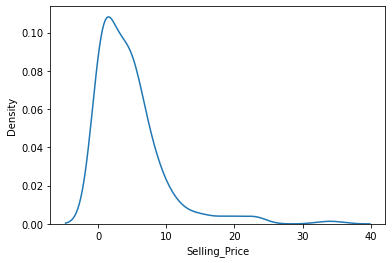

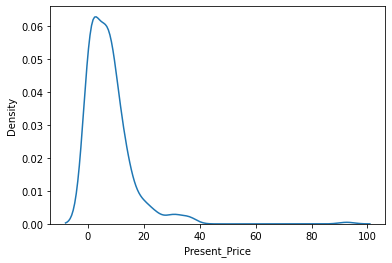

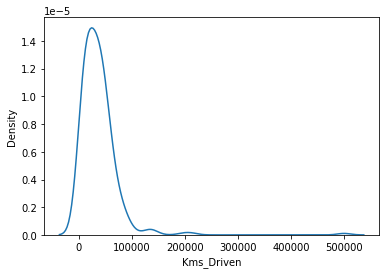

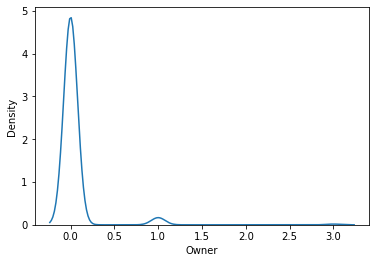

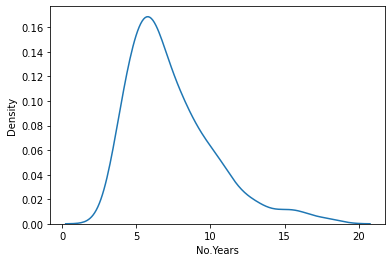

In [51]:
## checking the distribution

for feature in numerical_features:
  sns.kdeplot(df[feature])
  plt.show()

There are some outliers in the data applying the log transformation

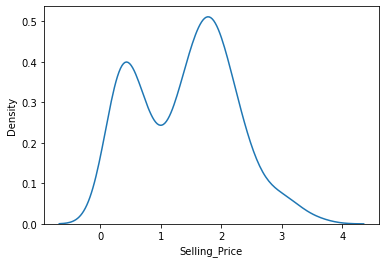

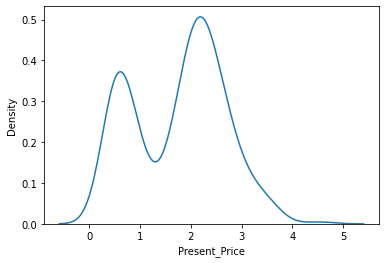

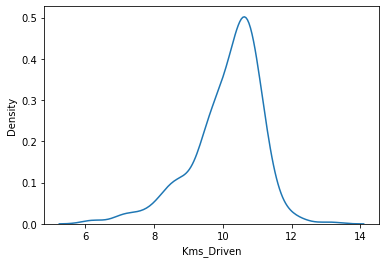

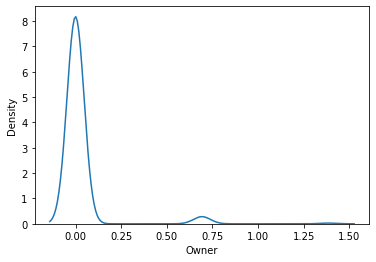

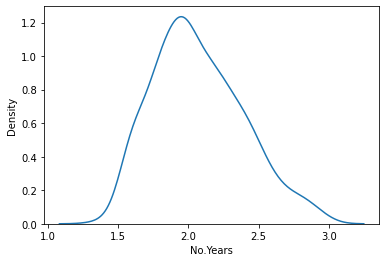

In [52]:


for feature in numerical_features:
  sns.kdeplot(np.log1p(df[feature]))
  plt.show()

now data is good 

In [71]:

# applying transformation
# removing target column form normalization
numerical_features.remove('Selling_Price')
for feature in numerical_features:
  df[feature]=np.log1p(df[feature])

In [72]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Diesel,Petrol,Individual,Manual,No.Years
0,3.35,1.885553,10.203629,0.0,0,1,0,1,2.079442
1,4.75,2.355178,10.668979,0.0,1,0,0,1,2.197225
2,7.25,2.384165,8.839422,0.0,0,1,0,1,1.609438
3,2.85,1.638997,8.556606,0.0,0,1,0,1,2.397895
4,4.60,2.063058,10.656106,0.0,1,0,0,1,2.079442


## Now data is ready

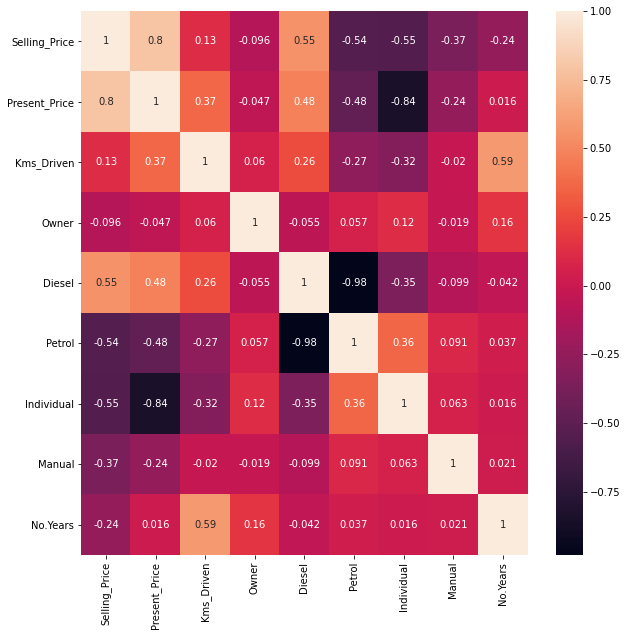

In [73]:
# corealtion matrix
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

## Modeling

In [75]:
from sklearn.model_selection import train_test_split

X=df.drop(columns=['Selling_Price'])
y=df['Selling_Price']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [76]:
#models

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [80]:
models=[
    LinearRegression(),
    Lasso(),
    Ridge(),
    ElasticNet(),
    SVR(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor()
]

In [83]:
scores={
    'r2':{'test':{},'train':{}},
    'mse':{'test':{},'train':{}}
}

In [84]:
from sklearn.metrics import mean_squared_error
for model in models:
  model.fit(X_train,y_train)

  train_pred=model.predict(X_train)
  test_pred=model.predict(X_test)

  r2_train=model.score(X_train,y_train)
  r2_test=model.score(X_test,y_test)

  mse_train=mean_squared_error(y_train,train_pred)
  mse_test=mean_squared_error(y_test,test_pred)

  scores['r2']['test'][model.__class__.__name__]=r2_test
  scores['r2']['train'][model.__class__.__name__]=r2_train

  scores['mse']['test'][model.__class__.__name__]=mse_test
  scores['mse']['train'][model.__class__.__name__]=mse_train


[17:53:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [87]:
# seperating scores

r2_df=pd.DataFrame(scores['r2']).sort_values(by='test',ascending=False)
mse_df=pd.DataFrame(scores['mse']).sort_values(by='test',ascending=False)


In [88]:
r2_df

,test,train
XGBRegressor,0.893243,0.994219
GradientBoostingRegressor,0.876748,0.996392
SVR,0.704525,0.480066
RandomForestRegressor,0.697515,0.989608
AdaBoostRegressor,0.623243,0.974305
ElasticNet,0.535999,0.545380
Lasso,0.488027,0.615336
Ridge,0.237613,0.823372
LinearRegression,0.190681,0.824082


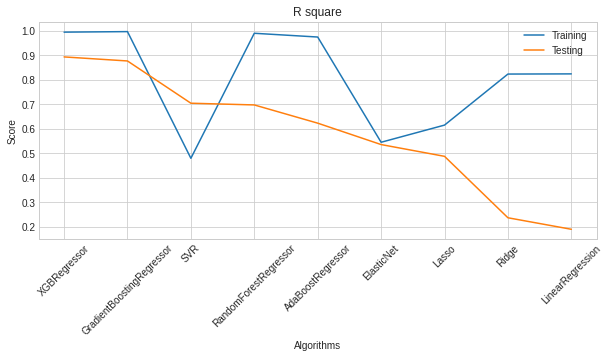

In [91]:
plt.style.use('seaborn-whitegrid')

plt.subplots(figsize=(10,4))
plt.plot(r2_df.index,r2_df['train'],label="Training")
plt.plot(r2_df.index,r2_df['test'],label="Testing")
plt.title("R square")
plt.xlabel("Algorithms")
plt.ylabel("Score")
plt.xticks(rotation=45) 
plt.legend()
plt.show()

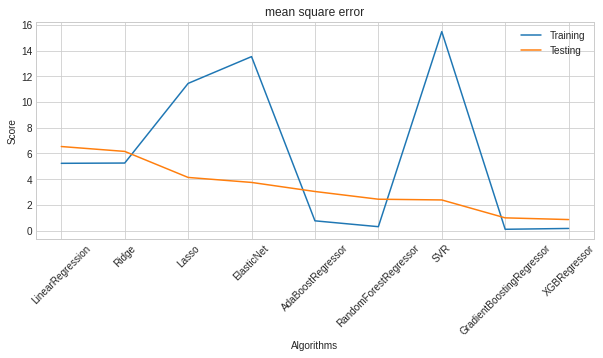

In [93]:
plt.subplots(figsize=(10,4))
plt.plot(mse_df.index,mse_df['train'],label="Training")
plt.plot(mse_df.index,mse_df['test'],label="Testing")
plt.title("mean square error")
plt.xlabel("Algorithms")
plt.ylabel("Score")
plt.xticks(rotation=45) 
plt.legend()
plt.show()

##XGB regressor performs well

In [96]:
## hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

params={
    "n_estimators":[100,150,200,250,300,350,400],
    "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
    "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight" : [ 1, 3, 5, 7 ],
    "gamma"             : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] 
}

In [97]:
model=XGBRegressor()

search=RandomizedSearchCV(model,param_distributions=params,n_iter=5,n_jobs=-1,cv=5,verbose=2)
search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[18:04:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                      

In [99]:
search.best_params_

{'colsample_bytree': 0.7,
 'eta': 0.2,
 'gamma': 0.2,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 300}

In [102]:
model=XGBRegressor(
  colsample_bytree= 0.7,
  eta=0.2,
  gamma=0.2,
  max_depth= 3,
  min_child_weight= 5,
  n_estimators= 300
)

model.fit(X_train,y_train)

[18:07:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, eta=0.2, gamma=0.2,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=5, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [103]:
model.score(X_train,y_train)

0.9927334960447125

In [107]:
import pickle

file = open('xgBoost.pkl', 'wb')

pickle.dump(model, file)

In [106]:
! pip freeze > requirements.txt